In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import statistics as sts
import numpy as np
import seaborn as sns
import pickle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.cluster import KMeans
%matplotlib inline

## 6 features

In [2]:
features_6_df = pd.read_csv('https://raw.githubusercontent.com/viniciusmioto/network_analysis/main/data/6_features_db.csv')
features_6_df

,Unnamed: 0,0,1,2,3,4,5
0,0,239.0,1.0,2.0,4828.0,3.999178,0.000411
1,1,165.0,1.0,2.0,1989.0,3.998005,0.000997
2,2,172.0,1.0,3.0,1333.0,5.994620,0.001792
3,3,97.0,1.0,2.0,1277.0,3.996887,0.001556
4,4,217.0,1.0,1.0,5836.0,1.999773,0.000227
...,...,...,...,...,...,...,...
3141,3141,23.0,1.0,0.0,320.0,1.586466,0.001194
3142,3142,65.0,1.0,0.0,2363.0,1.629453,0.000169
3143,3143,47.0,1.0,0.0,1466.0,1.676742,0.000271
3144,3144,30.0,1.0,0.0,257.0,1.757974,0.001651


In [3]:
features_6_df.describe()

,Unnamed: 0,0,1,2,3,4,5
count,3146.0000,3146.000000,3146.000000,3146.000000,3146.000000,3146.000000,3146.000000
mean,1572.5000,465.237444,1229.139224,36.263827,3090.922759,38.210991,0.105592
std,908.3163,939.385022,3206.497495,145.489091,8841.018227,145.046029,0.251411
min,0.0000,1.000000,1.000000,0.000000,1.000000,0.320000,0.000010
25%,786.2500,5.000000,1.000000,1.000000,4.000000,2.868990,0.000278
50%,1572.5000,41.000000,1.000000,2.000000,468.500000,3.998822,0.000948
75%,2358.7500,355.000000,104.750000,3.000000,2453.250000,5.997092,0.095238
max,3145.0000,7636.000000,19906.000000,989.000000,225942.000000,989.000000,1.000000


In [4]:
X_6_features = np.array(features_6_df)

In [5]:
scaler = MinMaxScaler()
scaled_6_features_X = scaler.fit_transform(X_6_features)

In [6]:
kmeans_6_features = KMeans(n_clusters=2, n_init=30)
kmeans_6_features.fit_predict(scaled_6_features_X)
kmeans_6_features.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

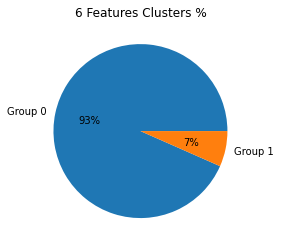

In [7]:
power_law_6f = sum(kmeans_6_features.labels_)/(len(kmeans_6_features.labels_))
data = [1 - power_law_6f, power_law_6f]
plt.pie(data, labels=['Group 0', 'Group 1'], autopct='%.0f%%')
plt.title('6 Features Clusters %')
plt.show()

## Graph2Vec

In [8]:
graph2vec_df = pd.read_csv('https://raw.githubusercontent.com/viniciusmioto/network_analysis/main/data/graph2vec_db.csv')
graph2vec_df

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,is_power_law
0,0,0.283226,-1.555381,-0.121139,0.220456,0.116647,-0.678064,1.872659,-0.676502,0.178234,1.801286,-0.665650,0.078173,-0.983346,-1.348082,-0.540847,-0.053811,-0.610999,2.146456,-0.006776,-0.924747,-0.469823,-0.700700,-0.340792,0.254332,-0.428917,0.809738,0.049616,-0.177372,-2.275054,-0.902289,-1.435698,-0.646209,0.642027,-0.422488,0.058161,0.132872,-0.160723,1.550581,1.003663,...,-0.470145,-0.078502,0.879602,-0.590490,0.646790,0.498324,1.016791,1.018782,-0.464928,1.835195,-0.872807,-0.976261,-0.269561,-1.683204,-0.325591,-0.318458,-0.034617,-0.502123,1.280567,0.813439,2.208925,0.589798,-0.585594,0.663595,-0.105845,-0.712773,0.385096,1.060231,0.728433,0.403087,-1.153790,1.209732,1.552829,-1.949741,2.080611,-0.703734,-1.996018,0.042010,0.412546,1
1,1,0.584198,-2.017837,0.498199,0.585044,0.943714,-0.814021,1.755427,-0.913293,0.779892,2.043380,0.048720,0.132257,-0.695167,-0.949858,-0.199968,0.232681,-0.869654,2.274969,-0.001600,-0.450485,0.407698,-1.081981,-0.114681,0.982609,-0.080398,0.250174,0.046967,0.271158,-1.254065,-0.431125,-0.873392,-0.682613,-0.029310,-0.143342,-0.581727,0.350579,-0.365542,1.869625,1.468321,...,-0.317583,0.239274,1.159502,-1.567539,-0.092970,0.004924,0.823521,1.119472,-0.739585,1.350198,-0.219639,-0.681059,0.376495,-0.939939,-0.181068,-0.673260,-0.018322,-0.506087,1.666583,0.481988,2.272324,1.294753,-0.652554,0.733464,0.147188,-0.683058,0.391918,0.769496,1.386197,0.256274,-0.387191,1.152594,1.334567,-2.393117,1.934806,-0.359636,-1.504011,-0.316761,0.316515,1
2,2,0.227998,-1.827693,0.342926,-0.027439,0.322606,-0.945044,2.034954,-0.301611,0.115928,1.966895,-0.471175,-0.071865,-0.989952,-1.194763,-0.622115,0.391535,-0.078218,2.079389,-0.233018,-0.984229,0.381250,-0.579963,-0.348461,0.455515,0.330299,0.329073,-0.482157,0.229686,-1.560974,-0.254917,-1.178133,-0.885855,0.354875,-0.376433,-0.224778,-0.173116,-0.693237,1.119859,1.726872,...,-0.154593,0.629998,1.322755,-0.902710,0.679017,0.168283,0.937681,1.308933,-0.444681,1.607754,-0.205641,-0.775442,0.216370,-1.428251,-0.886735,-0.618368,0.048050,-0.426833,1.893852,0.257605,1.159623,0.596009,-0.743968,0.298932,-0.536085,-0.984293,0.103874,0.501775,0.599790,0.317950,-0.705648,0.859727,1.433414,-2.040526,2.069890,-0.251924,-1.293017,-0.456093,0.259323,1
3,3,0.436618,-2.292978,1.078695,0.448068,0.685444,-0.804678,1.734705,-0.684630,0.659137,2.104952,0.161862,0.509871,-0.224656,-0.884773,0.181466,0.176759,-0.715915,1.817282,-0.145622,-1.163935,0.718997,-0.269778,-0.196568,0.734426,-0.376949,-0.086668,0.164442,0.244941,-1.366392,-0.523962,-1.033423,-0.609584,-0.366253,-0.369898,-0.547476,0.549961,-1.150980,1.556152,0.658198,...,-0.196946,0.200593,1.376433,-1.091689,0.141485,0.357328,1.035924,1.736181,-0.363883,1.603093,-0.298426,-0.904044,0.522272,-0.564553,0.068514,-0.415208,0.546919,-0.492946,1.899525,0.882866,2.102801,1.451428,-0.555090,0.240562,0.252116,-0.699346,0.174967,0.534152,1.307346,0.677575,-0.325053,1.330803,1.507303,-2.228408,1.818803,-0.450448,-1.572716,-0.381192,0.253463,1
4,4,0.139282,-1.680774,0.297711,-0.244004,0.465433,-1.256472,1.694093,-0.637881,0.695574,1.553462,0.416807,0.366108,-0.462960,-1.172405,-0.281146,0.147254,-0.701368,1.760005,-0.604829,-0.578767,-0.642436,-0.227762,0.223565,-0.283016,-0.499742,0.552941,0.177877,0.003506,-1.690982,-0.843619,-0.881816,-0.781674,-0.175499,-0.057275,0.153931,0.017539,-0.761199,1.011195,1.243130,...,-0.612834,0.155359,1.313796,-1.238314,0.257059,0.203198,0.831952,1.086989,-0.541909,1.934428,-0.971636,-1.134001,-0.046217,-1.221787,-0.142965,-0.852661,-0.108912,-0.439785,1.784301,0.691049,1.640730,0.691320,-0.965463,0.957317,0.085421,-1.361792,0.099702,0.338463,0.478697,0.784393,-0.569995,1.444263,0.859837,-2.665625,2.110024,-0.7

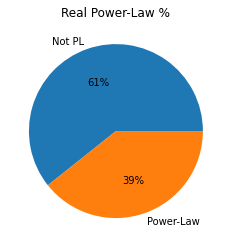

In [9]:
plt.title('Real Power-Law %')
groups = graph2vec_df['is_power_law'].value_counts() / len(graph2vec_df['is_power_law'])
plt.pie(groups, labels=['Not PL', 'Power-Law'], autopct='%.0f%%')
plt.show()

In [10]:
X_g2v = np.array(graph2vec_df.drop(['is_power_law'], 1))

In [11]:
scaler = MinMaxScaler()
scaled_X_g2v = scaler.fit_transform(X_g2v)

In [12]:
kmeans_g2v = KMeans(n_clusters=2, n_init=30)
kmeans_g2v.fit_predict(scaled_X_g2v)
kmeans_g2v.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

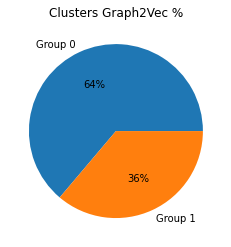

In [13]:
group1_g2v = sum(kmeans_g2v.labels_)/(len(kmeans_g2v.labels_))
data_g2v = [1 - group1_g2v, group1_g2v]
plt.pie(data_g2v, labels=['Group 0', 'Group 1'], autopct='%.0f%%')
plt.title('Clusters Graph2Vec %')
plt.show()

### accuracy

In [14]:
acc_list = []

for x in range(0, len(graph2vec_df['is_power_law'])):
  if graph2vec_df['is_power_law'].values[x] == kmeans_g2v.labels_[x]:
    acc_list.append(1)
  else:
    acc_list.append(0)

In [15]:
sum(acc_list)/len(acc_list)

0.8944356120826709

### lognormal prediction

In [16]:
lognormal_acc = acc_list[2845:-1]
sum(lognormal_acc)/len(lognormal_acc)

0.6086956521739131